# Linear Regression Model

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/chatreeasa/dataScience_housingPrice/main/raw_california-housing-prices.csv")

# Explore the dataset
print(data.head())  # Print the first few rows of the dataset
print(data.info())  # Display information about the dataset


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

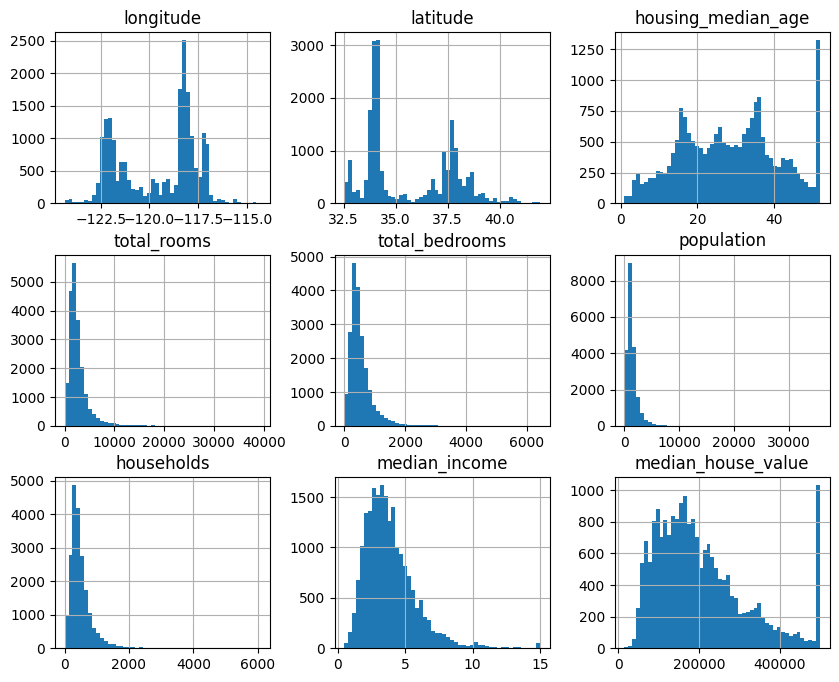

Done


In [13]:
# Visualize the dataset
data.hist(bins=50, figsize=(10, 8))
plt.show()

# Separate features and target variable
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

print("Done")

In [14]:

# Data Preprocessing
# Handling missing values (if any)
X = X.dropna()

# One-Hot Encoding for categorical feature 'ocean_proximity'
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])

# Feature Scaling
scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Feature Selection (optional)
# You can skip this step if you want to include all features in the model.

# Match number of samples in X and y
y = y[:len(X_encoded)]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Reverse feature scaling on predicted values
y_pred = scaler.inverse_transform(y_pred)

# Reverse feature scaling on actual values for evaluation
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 11009924733.306728
Mean Absolute Error: 80772.92996957655


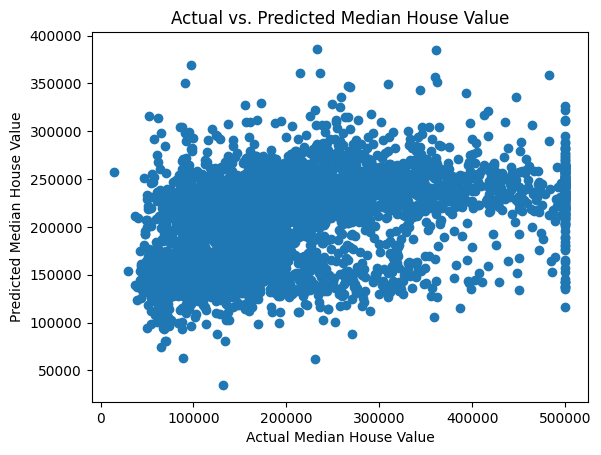

In [15]:
# Additional Analysis (optional)
# You can perform additional analysis on the model's performance, such as plotting the predicted values against the actual values.

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.show()


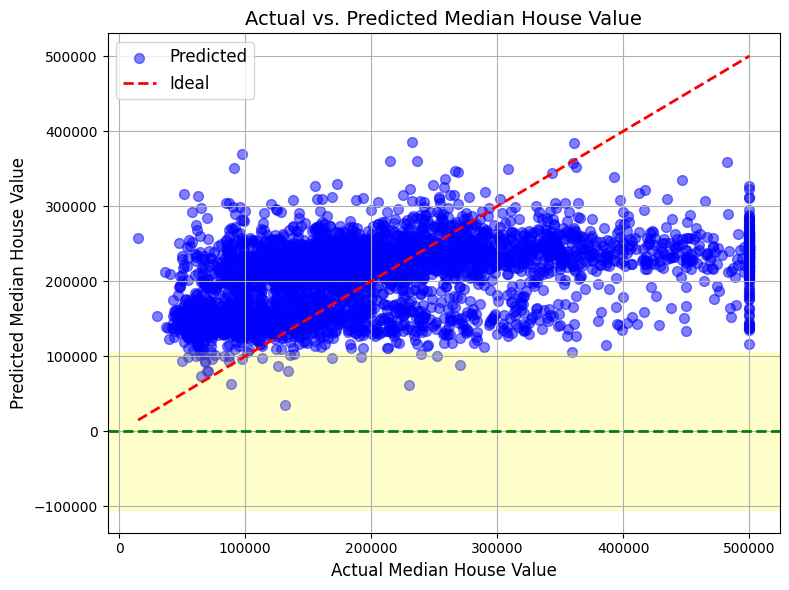

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, s=50, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel("Actual Median House Value", fontsize=12)
plt.ylabel("Predicted Median House Value", fontsize=12)
plt.title("Actual vs. Predicted Median House Value", fontsize=14)
plt.legend(fontsize=12)

# Add reference lines for deviation
deviation = y_pred - y_test
mean_deviation = np.mean(deviation)
plt.axhline(mean_deviation, color='green', linestyle='--', linewidth=2, label='Mean Deviation')
plt.axhspan(mean_deviation - np.std(deviation), mean_deviation + np.std(deviation), color='yellow', alpha=0.2, label='Standard Deviation')

plt.grid(True)
plt.tight_layout()
plt.show()


# Decision Tree Regressor

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

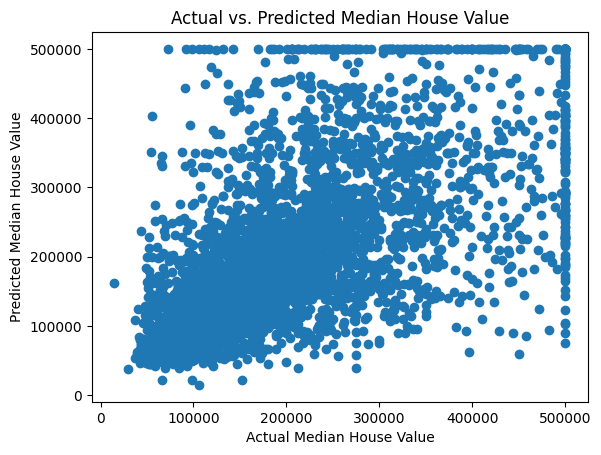

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/chatreeasa/dataScience_housingPrice/main/raw_california-housing-prices.csv")

# Explore the dataset
print(data.head())  # Print the first few rows of the dataset
print(data.info())  # Display information about the dataset

# Separate features and target variable
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Data Preprocessing
# Handling missing values (if any)
X = X.dropna()

# Align indices of X and y
X.reset_index(drop=True, inplace=True)
y = y[X.index]

# Convert categorical variables to numerical using one-hot encoding
cat_cols = ["ocean_proximity"]
num_cols = list(set(X.columns) - set(cat_cols))
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(), cat_cols)
    ]
)
X = preprocessor.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Additional Analysis (optional)
# You can perform additional analysis on the model's performance, such as plotting the predicted values against the actual values.

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.show()



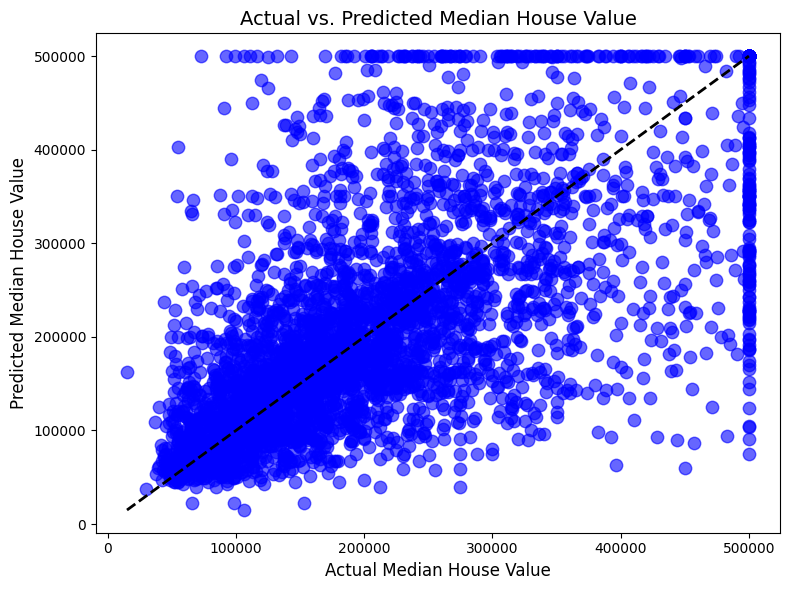

In [19]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization
plt.scatter(y_test, y_pred, c='b', alpha=0.6, s=80)  # Use blue dots with increased size and transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a reference line
plt.xlabel("Actual Median House Value", fontsize=12)
plt.ylabel("Predicted Median House Value", fontsize=12)
plt.title("Actual vs. Predicted Median House Value", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


# Support Vector Regressor

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

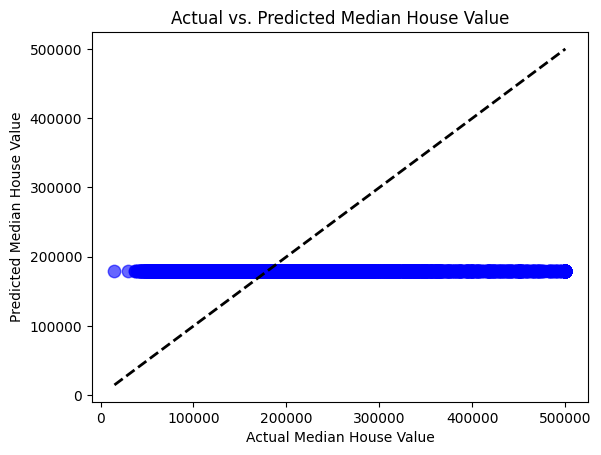

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/chatreeasa/dataScience_housingPrice/main/raw_california-housing-prices.csv")

# Explore the dataset
print(data.head())  # Print the first few rows of the dataset
print(data.info())  # Display information about the dataset

# Separate features and target variable
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Data Preprocessing
# Handling missing values (if any)
X = X.dropna()

# Align indices of X and y
X.reset_index(drop=True, inplace=True)
y = y[X.index]

# Convert categorical variables to numerical using one-hot encoding
cat_cols = ["ocean_proximity"]
num_cols = list(set(X.columns) - set(cat_cols))
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(), cat_cols)
    ]
)
X = preprocessor.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regressor
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Additional Analysis (optional)
# You can perform additional analysis on the model's performance, such as plotting the predicted values against the actual values.

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, c='b', alpha=0.6, s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.show()
